-  Collect Twitter data
-  Extract the tweet text and any metadata
-  Perform preprocessing of the text to allow for better application of NLP techniques.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<hr>

## Data Collection

In [4]:
import requests
import pandas as pd
import re
from dotenv import load_dotenv
import os

load_dotenv()

url = "https://twitter-api45.p.rapidapi.com/search.php"
query = input("Search your tweets")
querystring = {"query": query, "search_type": "Top"}

headers = {
    "x-rapidapi-key": os.getenv('X-RAPIDAPI-KEY'),
    "x-rapidapi-host": os.getenv('X-RAPIDAPI-HOST')
}

def fetch_tweets(querystring, headers, max_pages=200):
    all_tweets = []
    next_cursor = None
    page_count = 0
    
    while page_count < max_pages:
        if next_cursor:
            querystring['cursor'] = next_cursor  

        response = requests.get(url, headers=headers, params=querystring)
        json_data = response.json()

        tweets = json_data.get('timeline', [])
        all_tweets.extend(tweets)  

        next_cursor = json_data.get('next_cursor')
        
        if not next_cursor:
            break
        
        page_count += 1  

    return all_tweets

tweets = fetch_tweets(querystring, headers)

tweet_info = []
for tweet in tweets:
    tweet_id_str = tweet.get("tweet_id", "")
    date_time = tweet.get("created_at", "")
    
    user_info = tweet.get("user_info", {})
    location = user_info.get("location", "India")
    
    tweet_text = tweet.get("text", "")
    
    media = tweet.get("media", [])
    
    print(f"Tweet ID: {tweet_id_str}, Media: {media}")

    if isinstance(media, list):
        media_urls = [m.get("url") for m in media if isinstance(m, dict)]
    else:
        media_urls = []  
    
    media_content = ', '.join(media_urls)
    
    tweet_info.append([tweet_id_str, date_time, location, tweet_text, media_content])

df = pd.DataFrame(data=tweet_info, columns=['tweet_id_str', 'date_time', 'location', 'tweet_text', 'media_urls'])

print(df.head())

Tweet ID: 1907092398431510754, Media: {'video': [{'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1907092317204537344/pu/img/iGNiwv6xoLsK1Mjv.jpg', 'variants': [{'content_type': 'application/x-mpegURL', 'url': 'https://video.twimg.com/ext_tw_video/1907092317204537344/pu/pl/ZYkWZxrxqwcowfOT.m3u8?tag=12&v=ae0'}, {'bitrate': 256000, 'content_type': 'video/mp4', 'url': 'https://video.twimg.com/ext_tw_video/1907092317204537344/pu/vid/avc1/404x270/TyJ9BYJd_L1kMznF.mp4?tag=12'}, {'bitrate': 832000, 'content_type': 'video/mp4', 'url': 'https://video.twimg.com/ext_tw_video/1907092317204537344/pu/vid/avc1/540x360/q1H40ww-Wktdm7kq.mp4?tag=12'}, {'bitrate': 2176000, 'content_type': 'video/mp4', 'url': 'https://video.twimg.com/ext_tw_video/1907092317204537344/pu/vid/avc1/1082x720/8eiRZ49eHtloJtA8.mp4?tag=12'}], 'aspect_ratio': [541, 360], 'duration': 78529, 'original_info': {'height': 720, 'width': 1082, 'focus_rects': []}, 'id': '1907092317204537344'}]}
Tweet ID: 1903892256891052215, 

In [5]:
for i, tweet in enumerate(df['tweet_text'].head(20)):
    print(i + 1, tweet, '\n')

1 MUST WATCH 🚨😂

After Kunal Kamra, another stand up comedian brutally trolled BJP 

“Demonetization was not done for common people, but to buy MLAs” 🤣

Another burnól moment for BJP IT cell &amp; RW ecosystem 😂🔥 https://t.co/FOiTXJwwUw 

2 Modi Bhakts and IT cell being destroyed with top class humour 🤣

This Stand Up by Kunal Kamra has shaken the entire BJP, they are filing FIRs left and right on this. 

Watch it before it is deleted 🤣 
  https://t.co/eSpcdF3WLL 

3 He is Devesh Dixit, Stand up comedian 

Came up with another nightmare for BJP and RW ecosystem 🔥

"Demonetization was not done for common man, it was done to buy MLAs" 🔥😂

WATCH &amp; SPREAD this gem. https://t.co/3JiWTcoP3o 

4 @kunalkamra88 He is Devesh Dixit, stand up comedian 

Taking BJP to cleaners 🔥

"Demonetization was done not for common man but to buy MLAs" 😂

Will they vandalize this venue too? https://t.co/GHfrsovylL 

5 "Samay Raina", the best stand-up comedian in India right now. https://t.co/qNEtuKyB6P 

6 

Now let's print the text of the first 20 tweets to see if our query is working correctly.

In [6]:
def clean_text(text):
    """
    A function to clean the tweet text
    """
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    # Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    # Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

# Apply the clean_text function to the 'tweet_text' column
df['tweet_text'] = df['tweet_text'].apply(clean_text)

In [7]:
for i, tweet in enumerate(df['tweet_text'].head(20)):
    print(i + 1, tweet, '\n')

df['tweet_text'] = df['tweet_text'].str.lower()
print(df.head())

1 MUST WATCH After Kunal Kamra, another stand up comedian brutally trolled BJP Demonetization was not done for common people, but to buy MLAs Another burn l moment for BJP IT cell amp RW ecosystem  

2 Modi Bhakts and IT cell being destroyed with top class humour This Stand Up by Kunal Kamra has shaken the entire BJP, they are filing FIRs left and right on this. Watch it before it is deleted  

3 He is Devesh Dixit, Stand up comedian Came up with another nightmare for BJP and RW ecosystem Demonetization was not done for common man, it was done to buy MLAs WATCH amp SPREAD this gem.  

4  He is Devesh Dixit, stand up comedian Taking BJP to cleaners Demonetization was done not for common man but to buy MLAs Will they vandalize this venue too?  

5  Samay Raina , the best stand up comedian in India right now.  

6 Stand Up Comedian Atul Khatri praises BMC and Uddhav Thackeray Govt for Covid handling in Mumbai... by two See his latest stand up  

7 Kunal Kamra is a stand up comedian who ex

<hr>

In [8]:
stopWords = stopwords.words("english")

In [9]:
def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    filtered_tokens = [token for token in tokens if token not in stopWords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [10]:
df['tweet_text']=df['tweet_text'].apply(remove_stopwords)

for i,tweet in enumerate(df['tweet_text'].head(20)):
    print(i+1, tweet, '\n')

1 must watch kunal kamra , another stand comedian brutally trolled bjp demonetization done common people , buy mlas another burn l moment bjp cell amp rw ecosystem 

2 modi bhakts cell destroyed top class humour stand kunal kamra shaken entire bjp , filing firs left right this. watch deleted 

3 devesh dixit , stand comedian came another nightmare bjp rw ecosystem demonetization done common man , done buy mlas watch amp spread gem. 

4 devesh dixit , stand comedian taking bjp cleaners demonetization done common man buy mlas vandalize venue ? 

5 samay raina , best stand comedian india right now. 

6 stand comedian atul khatri praises bmc uddhav thackeray govt covid handling mumbai ... two see latest stand 

7 kunal kamra stand comedian exposed truths government comedy. result , bjp supporters went studio created chaos. india still democratic country ? #kunalkamra #democracy #freedomofspeech 

8 gurpatwant singh pannu , upcoming standup comedian republic khalistan ! disclaimer purely en

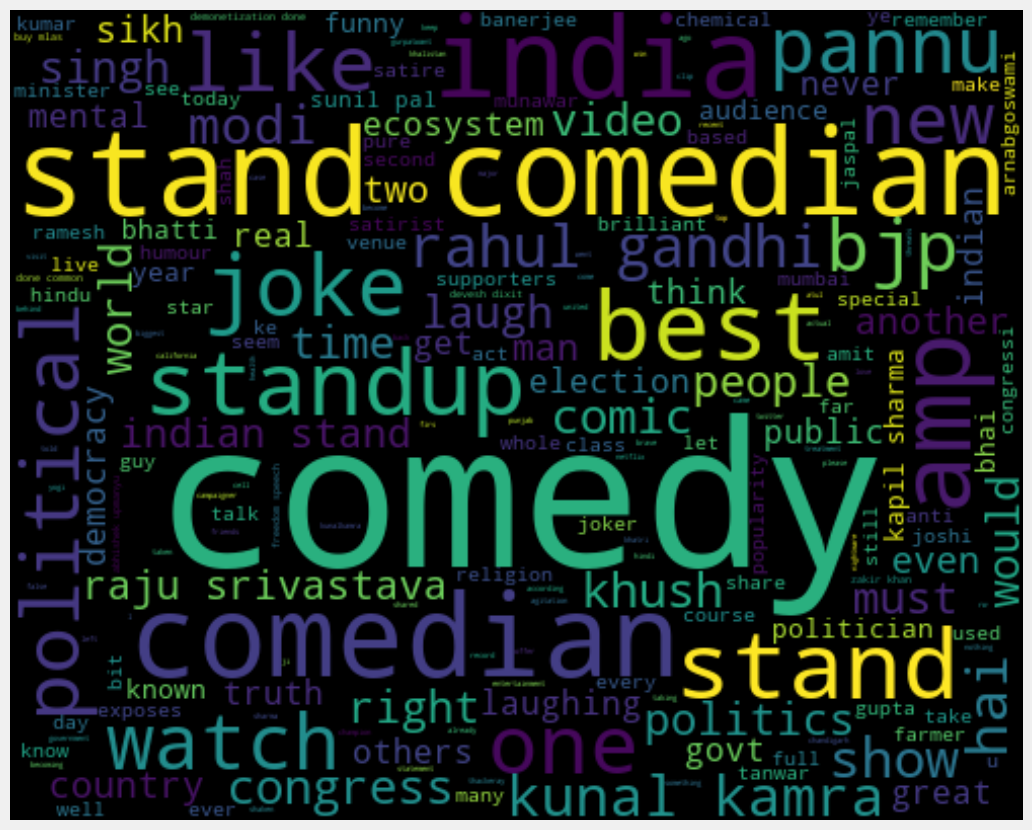

In [11]:
all_words = ' '.join( [data for data in df['tweet_text']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopWords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Save the DataFrame to a CSV file
df.to_csv('../data/threads_data.csv', index=False)
print("Data saved to 'threads_data.csv'")

Data saved to 'threads_data.csv'


<hr>